In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy as sc
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import gensim
import re
import gensim.downloader as model_api
from sklearn.model_selection import train_test_split

/Users/Coding/mambaforge/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
monkland = pd.read_csv('/Users/Coding/Desktop/School/Final Project/Data/Monkland.csv')
monkland

,Date,Name,Review,Rating
0,a day ago,tom Morris,"300 dollars to put my cat down,absolutely app...",1 star
1,5 days ago,julie pinard,Je vais à cette clinique depuis son ouverture ...,5 stars
2,a week ago,Ben M,NaN,5 stars
3,2 weeks ago,Bryn Williams-Jones,"Excellent customer service, quick appointments...",5 stars
4,3 weeks ago,Hugo Tardy,(Translated by Google) My dog ​​has been a pat...,5 stars
...,...,...,...,...
195,4 years ago,Graeme Bent,A little pricey but professional!,4 stars
196,4 years ago,Cristian M,"Professional staff, a little bit expensive but...",4 stars
197,5 years ago,Jeff Langsner,First thing you'll notice is that it's nice in...,5 stars
198,5 years ago,Charles Tatossian,Great veterinarian. Easy to book an appointment.,5 stars


In [3]:
monkland = monkland.dropna()
monkland = monkland.drop(['Date', 'Name'], axis = 1)

In [4]:
monkland.Rating = monkland.Rating.str.replace('5 stars', '5')
monkland.Rating = monkland.Rating.str.replace('4 stars', '4')
monkland.Rating = monkland.Rating.str.replace('3 stars', '3')
monkland.Rating = monkland.Rating.str.replace('2 stars', '2')
monkland.Rating = monkland.Rating.str.replace('1 star', '1')
monkland.Rating = monkland.Rating.astype(int)
monkland

,Review,Rating
0,"300 dollars to put my cat down,absolutely app...",1
1,Je vais à cette clinique depuis son ouverture ...,5
3,"Excellent customer service, quick appointments...",5
4,(Translated by Google) My dog ​​has been a pat...,5
5,My dog goes here and they love her so much. Th...,5
...,...,...
195,A little pricey but professional!,4
196,"Professional staff, a little bit expensive but...",4
197,First thing you'll notice is that it's nice in...,5
198,Great veterinarian. Easy to book an appointment.,5


In [5]:
monkland.Review = monkland.Review.astype(str)
monkland.Review = [x.lower() for x in monkland.Review]

In [6]:
words = monkland.Review.str.split()
words = pd.DataFrame(words.tolist())

In [7]:
replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))

def replacer(text):
    return rep[re.escape(text.group(0))]

words = monkland.Review.str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())
words

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,300,dollars,to,put,my,cat,downabsolutely,appalling,can,get,...,None,None,None,None,None,None,None,None,None,None
1,je,vais,à,cette,clinique,depuis,son,ouverture,il,y,...,None,None,None,None,None,None,None,None,None,None
2,excellent,customer,service,quick,appointments,good,food,toy,supply,friendly,...,None,None,None,None,None,None,None,None,None,None
3,translated,by,google,my,dog,​​has,been,a,patient,at,...,None,None,None,None,None,None,None,None,None,None
4,my,dog,goes,here,and,they,love,her,so,much,...,s,not,more,expensive,than,another,bilingual,and,friendly,staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,a,little,pricey,but,professional,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
112,professional,staff,a,little,bit,expensive,but,you,re,do,...,None,None,None,None,None,None,None,None,None,None
113,first,thing,you,ll,notice,is,that,it,s,nice,...,None,None,None,None,None,None,None,None,None,None
114,great,veterinarian,easy,to,book,an,appointment,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
word_vectors = model_api.load("glove-wiki-gigaword-200")

words.columns = words.columns.astype(str)

def soft_get(w):
    try:
        return word_vectors[w]
    except KeyError:
        return np.zeros(word_vectors.vector_size)
    
def map_vectors(row):
    try:
        return np.sum(
            row.loc[row.notna()].apply(soft_get)
        )
    except:
        return np.zeros(word_vectors.vector_size)
    
emb = pd.DataFrame(words.apply(map_vectors, axis=1))
emb.columns = ['C']
emb = pd.DataFrame(np.array(emb.C.apply(pd.Series)))
emb

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,2.310112,0.184148,-5.147873,-5.847493,1.868220,-0.166987,-4.255875,0.902579,-0.555846,5.252027,...,-2.924835,1.264085,0.193573,0.109847,1.912112,0.169185,-1.012105,2.949978,-3.651903,3.203465
1,4.992342,3.950822,1.991082,5.435063,2.439645,-16.526867,-8.282687,5.294378,-10.711669,-5.985735,...,-14.538766,-3.297365,9.159254,0.100321,-13.389573,4.047852,18.406192,-6.719706,1.616740,18.639525
2,5.718776,1.301050,0.754441,-3.115735,-0.818206,-3.448382,-8.097021,2.001308,1.811451,4.684975,...,-2.999131,-0.051573,-3.211743,3.429815,3.181110,1.337097,-2.732362,0.122077,0.032436,6.282103
3,6.523246,7.550545,-1.977168,-8.203060,1.983517,-0.449976,-15.936988,0.615220,1.922196,6.707335,...,-8.029966,0.100479,-4.795282,2.907504,3.592042,-1.060258,-1.091403,7.224888,-1.373006,6.058070
4,12.722073,12.747934,-6.637113,-16.921139,-1.364317,0.096019,-24.641417,3.028175,5.252769,12.335336,...,-12.768516,1.179166,-13.916639,5.406170,10.372214,-0.885657,-4.090545,7.875815,-7.037201,6.504989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.886447,-0.391927,-1.652930,-2.384100,1.115977,-0.502560,-1.913526,1.810755,0.642633,-0.394230,...,-0.775428,1.294883,0.091399,0.237309,0.656999,0.316890,-1.267820,0.428117,-0.825751,-0.185795
112,6.009457,2.101545,-1.832522,-4.177431,1.005877,0.061184,-7.202008,2.207660,2.636639,4.474960,...,-3.373123,2.403999,-1.266470,0.513764,2.398269,0.173439,-0.687134,1.408187,-2.979096,2.190699
113,9.411543,4.408136,-0.860860,-6.426993,-3.517828,-1.091286,-13.364054,-1.008099,1.302212,8.943884,...,-5.138079,-1.145807,-6.440570,1.515540,3.855323,4.188073,2.249952,6.033965,-6.852807,4.128841
114,2.346310,1.329847,0.632575,-2.211347,1.665100,-0.480648,-1.567512,-0.319424,0.757325,0.484928,...,-0.634160,1.016852,-0.384747,0.045584,0.743470,0.517805,-1.094156,1.362964,-0.539270,-0.060504


In [9]:
emb = emb.fillna(0)

In [10]:
X = Normalizer().fit_transform(emb) #Normalizer gives better score
sgdr = SGDRegressor()
sgdr.fit(X, monkland['Rating'])
monkland['gensim'] = sgdr.predict(X)
sgdr.score(X, monkland['Rating']) #not very good

0.008605950405660812

In [11]:
COMPRESSED_SIZE = 100

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(monkland['Review'])

Xd = X.toarray()
Xd = PCA(COMPRESSED_SIZE).fit(Xd.T).components_.T
Xd = sm.add_constant(Xd)

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(emb)
    distortions.append(kmeanModel.inertia_)

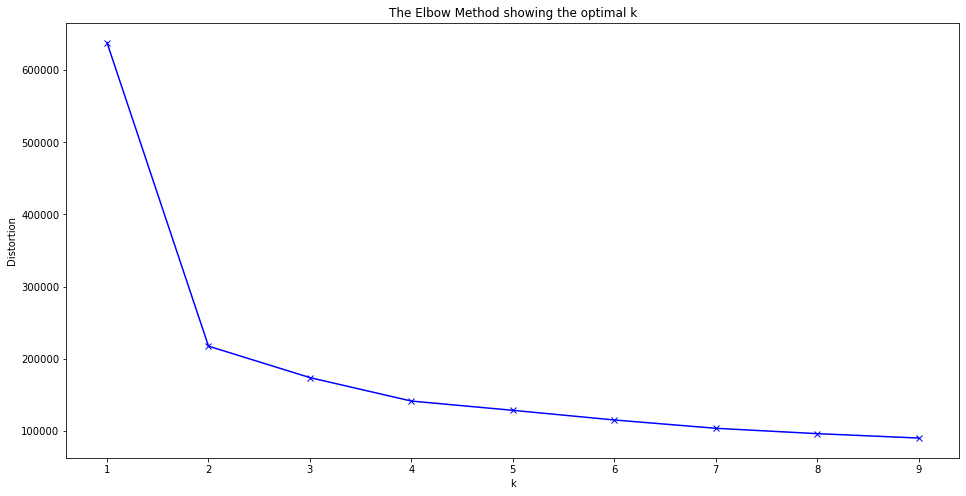

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() #3 clusters is the way to go

In [14]:
k = 3
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X)
clusters = model.predict(X)

In [15]:
y = np.array(monkland['Rating'])
labels = np.zeros_like(clusters)
for i in range(5):
    mask = (clusters == i)
    labels[clusters == i] = mode(y[clusters == i])[0]

In [16]:
monkland['kmeans_tfidf'] = labels
monkland

,Review,Rating,gensim,kmeans_tfidf
0,"300 dollars to put my cat down,absolutely app...",1,4.340769,5
1,je vais à cette clinique depuis son ouverture ...,5,3.013250,5
3,"excellent customer service, quick appointments...",5,4.520668,5
4,(translated by google) my dog ​​has been a pat...,5,4.586739,5
5,my dog goes here and they love her so much. th...,5,4.561163,5
...,...,...,...,...
195,a little pricey but professional!,4,4.359778,5
196,"professional staff, a little bit expensive but...",4,4.527184,5
197,first thing you'll notice is that it's nice in...,5,4.593243,5
198,great veterinarian. easy to book an appointment.,5,4.457482,5


In [17]:
fowlkes_mallows_score(monkland.kmeans_tfidf, y)

0.7616166818124407

In [18]:
accuracy_score(monkland.kmeans_tfidf, y)

0.75

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [22]:
fowlkes_mallows_score(y_pred, y_test) #best results

0.8331372318284807